# Analyze President Speeches
When you analyze the sentiment of a body of text, you can look at it from two perspectives:

* How positive, neutral or negative is the text? This is called the polarity. Statements about love and happiness will have a positive vibe to them and be given a polarity of 1. Statements about doom and destruction will have a negative vibe and be given a polarity of -1. This being a happy moment in the candidates’ lives, and the fact that they are talking to a friendly crowd, I expected the overall sentiment to be positive.

* How emotional is the text? A speech can be neutral either because it is simply a recitation of facts, or because the positive polarities and negative polarities cancel each other. So, you should look at the sentiment underlying the text on both these dimensions.

In [1]:
import argparse
import pandas as pd
import numpy as np
import urllib2

from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [9]:
 def process_entities(result):
    entity_array_positive = set()
    for entity in result.entities:
      if entity.type == 1 or entity.type == 3:
        for mention in entity.mentions:
          if mention.sentiment.score > 0.89:
            entity_array_positive.add(mention.text.content)
    return entity_array_positive

In [11]:
speeches = [
  ['Hillary Clinton', 'D', 2016, 'http://www.presidency.ucsb.edu/ws/index.php?pid=118051'],
  ['Donald Trump', 'R', 2016, 'http://www.presidency.ucsb.edu/ws/index.php?pid=117935'],
  ['Barack Obama', 'D', 2012, 'http://www.presidency.ucsb.edu/ws/index.php?pid=101968'],
  ['Mitt Romney', 'R', 2012, 'http://www.presidency.ucsb.edu/ws/index.php?pid=101966'],
  ['Barack Obama', 'D', 2008, 'http://www.presidency.ucsb.edu/ws/index.php?pid=78284'],
  ['John McCain', 'R', 2008, 'http://www.presidency.ucsb.edu/ws/index.php?pid=78576'],
  ['John Kerry', 'D', 2004, 'http://www.presidency.ucsb.edu/ws/index.php?pid=25971'],
  ['George W Bush', 'R', 2004, 'http://www.presidency.ucsb.edu/ws/index.php?pid=72727'],
  ['Al Gore', 'D', 2000, 'http://www.presidency.ucsb.edu/ws/index.php?pid=25963'],
  ['George W Bush', 'R', 2000, 'http://www.presidency.ucsb.edu/ws/index.php?pid=25954']
]

sentiment = []
client = language.LanguageServiceClient()
for (speaker, party, year, url) in speeches:
  text_of_speech = urllib2.urlopen(url).read()
  document = types.Document(
        content=unicode(text_of_speech, errors='ignore'),
        type=enums.Document.Type.HTML)
  response = client.analyze_sentiment(document=document)
  response_entities = client.analyze_entity_sentiment(document=document)
  polarity = response.document_sentiment.score
  magnitude = response.document_sentiment.magnitude
  entity_pos = process_entities(response_entities)
  print('POLARITY=%s MAGNITUDE=%s SPEAKER=%s POSITIVE_MENTIONS=%s' % (polarity, magnitude, speaker,entity_pos.encode("utf-8")))
  sentiment.extend([speaker, party, year, float(polarity), float(magnitude),entity_pos])

AttributeError: 'set' object has no attribute 'encode'

In [17]:
df = pd.DataFrame(data=np.array(sentiment).reshape(10,5),
                  columns=['speaker', 'party', 'year', 'polarity', 'magnitude'])
for col in ['year', 'polarity', 'magnitude']:
  df[col] = pd.to_numeric(df[col])

### Everyone is quite emotional. Except Obama 2008

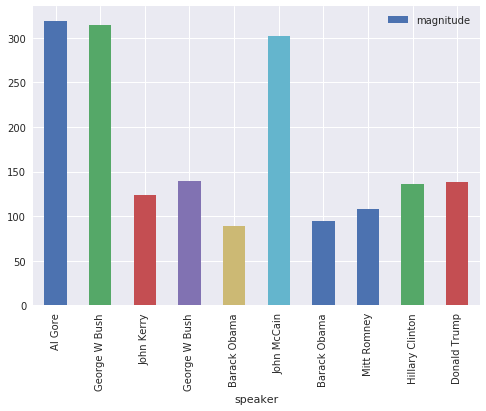

In [16]:
df = df.sort_values('year')
df.plot(x='speaker',  y='magnitude', kind='bar')